(a) Encuentre el esquema explícito de diferencias finitas para esta ecuaci´on.
$$
\frac{u_{i,j}^{l+1}-u_{i,j}^{l-1}}{(\Delta t)} + u_{i,j}^{l}\frac{u_{i+1,j}^{l}-u_{i-1,j}^{l}}{(\Delta x)}+u_{i,j}^{l}\frac{u_{i,j+1}^{l}-u_{i,j-1}^{l}}{(\Delta y)}= \nu (\frac{u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}}{(\Delta x)^2})+\nu (\frac{u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}}{(\Delta y)^2})
$$

$$
u_{i,j}^{l+1}= \Delta t(\nu (\frac{u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}}{(\Delta x)^2})+\nu (\frac{u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}}{(\Delta y)^2}) - u_{i,j}^{l}\frac{u_{i+1,j}^{l}-u_{i-1,j}^{l}}{(\Delta x)}-u_{i,j}^{l}\frac{u_{i,j+1}^{l}-u_{i,j-1}^{l}}{(\Delta y)}) + u_{i,j}^{l-1}
$$

In [21]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [80]:
Nt = 500
Nx = 60
Ny = 60
x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Ny)
t = np.linspace(0,10,Nt)
nu = 0.3
deltax = x[1] - x[0]
deltay = y[1] -y[0]
deltat = t[1] - t[0]
print(deltay, deltax,deltat)

0.16949152542372836 0.16949152542372836 0.02004008016032064


In [81]:
def h1(x,y):
    return 5*np.exp(-x**2-y**2)


In [82]:
T = np.zeros((Nt,Nx,Ny))
T

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [156]:
def initT(x,y):
    T = np.zeros((Nt,Nx,Ny))
    
    for i in range(len(x)-1):
        for j in range(len(y)-1):
            T[0,i,j] = h1(x[i],y[j])
    T[0,-1, 0] = 0
    T[0,0, :] = 0
    T[0,:,0] = 0
    T[0,:,-1] = 0
    
    
    return T

In [157]:
u = initT(x,y)

In [158]:
u

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.70071223e-20, 1.34940473e-19, ...,
         1.34940473e-19, 2.70071223e-20, 0.00000000e+00],
        [0.00000000e+00, 1.34940473e-19, 6.74227010e-19, ...,
         6.74227010e-19, 1.34940473e-19, 0.00000000e+00],
        ...,
        [0.00000000e+00, 1.34940473e-19, 6.74227010e-19, ...,
         6.74227010e-19, 1.34940473e-19, 0.00000000e+00],
        [0.00000000e+00, 2.70071223e-20, 1.34940473e-19, ...,
         1.34940473e-19, 2.70071223e-20, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [159]:
T[0,1,1]

0.0

In [160]:
def GetSolution(T):
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(2,len(x)-2):
            for j in range(2,len(y)-2):
                
                
                T[l,i,j] = deltat*(-T[l-1,i,j]*(T[l-1,i+1,j]-T[l-1,i-1,j])/(2*deltax) + nu*(T[l-1,i+1,j] -2*T[l-1,i,j] +T[l-1,i-1,j])/(deltax**2) -T[l-1,i,j]*(T[l-1,i,j+1]-T[l-1,i,j-1])/(2*deltay) + nu*(T[l-1,i,j+1] -2*T[l-1,i,j] +T[l-1,i,j-1])/(deltax**2)) + T[l-1,i,j]

In [161]:
GetSolution(u)

100%|████████████████████████████████████████████████████████████████████████████████| 499/499 [00:08<00:00, 57.49it/s]


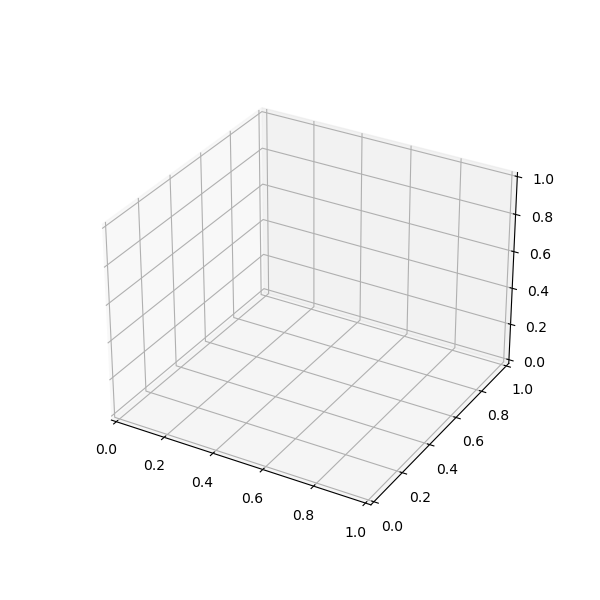

In [163]:

# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection = '3d' )
X,Y = np.meshgrid(x,y)
def init():
    
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    #ax.set_zlim3d(-1.5,1.5)
    #ax.set_xlabel(r'$x[m]$', fontsize=15)
    #ax.set_ylabel(r'$u(x)$', fontsize=15)    
    
def Update(i):
    ax.clear()
    init()
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    #plot = ax.scatter(x,u[i,:], marker='o', color='r')
    #plot = plt.legend(loc=0)
    

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)